In [ ]:
# -*- coding: utf-8 -*-


# 전처리 & 정규화

from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df=pd.read_csv('/content/drive/MyDrive/ml/data/Fraud.csv')

df.head()

df.info()

df.isnull().sum()

df['isFraud'].value_counts()

df.describe()


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.groupby(['isFraud', 'type']).size().unstack(fill_value=0)

# one-hot encoder
types = pd.get_dummies(df['type'])
types.head()

# label encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['nameOrig'] = label.fit_transform(df['nameOrig'])
df['nameDest'] = label.fit_transform(df['nameDest'])

In [ ]:
df = pd.concat([df, types], axis=1)
df = df.drop('type', axis=1)
df = df.drop(['step'], axis=1)

df.head()

X = df.drop('isFraud', axis = 1) # feature
y = df['isFraud'] # label

X.shape, y.shape

((6362620, 13), (6362620,))

In [ ]:
RANDOM_SEED = 42
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_under, y_under = rus.fit_resample(X, y)

print('lable : ')
print(pd.Series(y_under).value_counts())

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=RANDOM_SEED)

print('RandomUnderSampling train set : ', X_train_under.shape, y_train_under.shape)

lable : 
0    8213
1    8213
Name: isFraud, dtype: int64
RandomUnderSampling train set :  (13140, 13) (13140,)


In [ ]:
RANDOM_SEED = 42

from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

smote = SMOTE(random_state=RANDOM_SEED)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('lable : ')
print(pd.Series(y_train_over).value_counts())
print('SMOTE train set : ', X_train_over.shape, y_train_over.shape)

lable : 
0    5083503
1    5083503
Name: isFraud, dtype: int64
SMOTE train set :  (10167006, 13) (10167006,)


In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler_under = StandardScaler().fit(X_train_under)

X_train_under_scaled = std_scaler_under.transform(X_train_under)

X_test_under_scaled = std_scaler_under.transform(X_test_under)

In [ ]:
print(X_train_under_scaled[:10])

[[-0.42507879  1.54064314 -0.30105755 -0.11212719  1.14811629 -0.19977104
  -0.28031565 -0.0302337  -0.35450618 -0.86354816 -0.05796382  2.25963447
  -0.64541371]
 [-0.44141933  0.36421259 -0.38509374 -0.20875718 -0.7010858  -0.0492685
  -0.13909182 -0.0302337  -0.35450618 -0.86354816 17.25214084 -0.44254945
  -0.64541371]
 [ 0.39482084 -0.1013111   0.09868026 -0.21203341 -0.34565313 -0.1812047
   0.08001191 -0.0302337  -0.35450618  1.15801301 -0.05796382 -0.44254945
  -0.64541371]
 [-0.31563093  1.31085544 -0.38824743 -0.11636098 -0.23917395 -0.19977104
  -0.28031565 -0.0302337   2.82082527 -0.86354816 -0.05796382 -0.44254945
  -0.64541371]
 [-0.44235006  0.45614636 -0.36612323 -0.18346092  1.70885871 -0.19977104
  -0.28031565 -0.0302337  -0.35450618 -0.86354816 -0.05796382  2.25963447
  -0.64541371]
 [-0.39182926  0.44071992 -0.35878255 -0.21203341  0.04773663 -0.19977104
  -0.28031565 -0.0302337  -0.35450618 -0.86354816 -0.05796382 -0.44254945
   1.54939379]
 [ 0.36728988  1.4597218

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler_over = StandardScaler().fit(X_train_over)

X_train_over_scaled = std_scaler_over.transform(X_train_over)

X_test_over_scaled = std_scaler_over.transform(X_test)

In [ ]:
from keras import backend as K
def recall(y_target, y_pred):
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # divide by zero error 예방
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    return recall


def precision(y_target, y_pred):
    y_pred_yn = K.round(K.clip(y_pred, 0, 1))
    y_target_yn = K.round(K.clip(y_target, 0, 1))

    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # divide by zero error 예방
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # divide by zero error 예방
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())

    return _f1score

def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.plot(epoch_range, history.history['val_recall'])
  plt.plot(epoch_range, history.history['val_precision'])
  plt.plot(epoch_range, history.history['val_f1score'])
  plt.title('Model f1score')
  plt.ylabel('score')
  plt.xlabel('Epoch')
  plt.legend(['accuracy', 'recall', 'precision', 'f1score'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [ ]:
def print_score(y_test, y_pred):
    print(f"Recall Score: {recall_score(y_test, y_pred)}")
    print(f"Precision Score: {precision_score(y_test, y_pred)}")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

In [ ]:
from sklearn.model_selection import learning_curve
def plot_acc(estimator, X, y):
    # cv is the number of folds while performing Cross Validation
    sizes, training_scores, testing_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)
  
    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
    # Drawing plot
    plt.title("Accuracy")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit, learning_curve, cross_val_score

def plot_learning_curve(estimator, x, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 20), s='neg_log_loss'):
    # train_sizes의 80%(cv=5)를 0.1, 0.325, 0.55, 0.775, 1의 비율로 학습시긴다.
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=s)
    if s.find('neg') != -1:
        train_scores, test_scores = -train_scores, -test_scores
    train_scores_mean = np.nanmean(train_scores, axis = 1)
    test_scores_mean = np.nanmean(test_scores, axis = 1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Test score")
    plt.xlabel('Training size')
    plt.ylabel('Loss')
    # 그림에 선 표시
    plt.grid(True)
    # 범례 표시: best - 자동으로 최적의 위치에
    plt.legend(loc="best")
    plt.show()

In [ ]:
# SVM

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

parameters = {'C' : [0.0001,0.001,0.01,0.1,0,1,10,50,100]}
grid_svm = GridSearchCV(LinearSVC(), parameters, cv=3, return_train_score=True, n_jobs=-1)
grid_svm.fit(X_train_under_scaled,y_train_under)

GridSearchCV(cv=3, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 50, 100]},
             return_train_score=True)

In [ ]:
print("Best Parameter",grid_svm.best_params_)

Best Parameter {'C': 10}


In [ ]:
parameters = {'C' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
grid_svm = GridSearchCV(LinearSVC(), parameters, cv=3, return_train_score=True, n_jobs=-1)
grid_svm.fit(X_train_under_scaled,y_train_under)

GridSearchCV(cv=3, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                               16, 17, 18, 19, 20]},
             return_train_score=True)

In [ ]:
print("Best Parameter",grid_svm.best_params_)

Best Parameter {'C': 20}


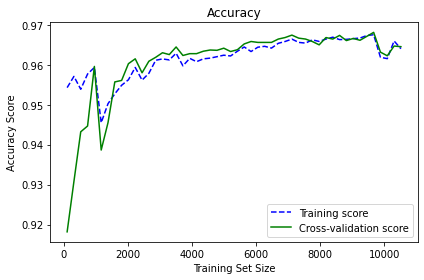

In [ ]:
plot_acc(grid_svm, X_train_under_scaled, y_train_under)

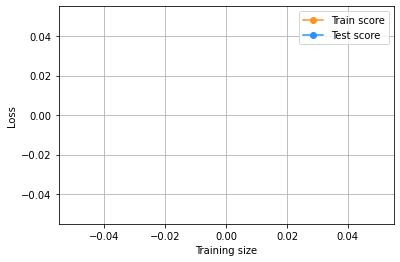

In [ ]:
plot_learning_curve(grid_svm, X_train_under_scaled, y_train_under)

In [ ]:
svm_under = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=13))
])
    
svm_under.fit(X_train_under_scaled, y_train_under)

svm_y_pred_under = svm_under.predict(X_test_under_scaled)

print_score(y_test_under, svm_y_pred_under)

Recall Score: 0.9743433109346366
Precision Score: 0.9562350119904077
Accuracy Score: 0.9650030432136336
F1 Score: 0.9652042360060515


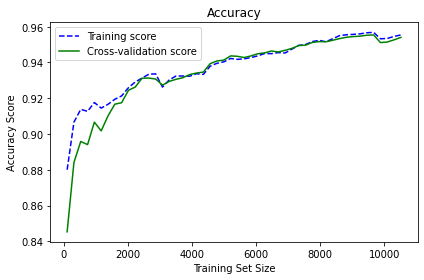

In [ ]:
plot_acc(svm_under, X_train_under_scaled, y_train_under)

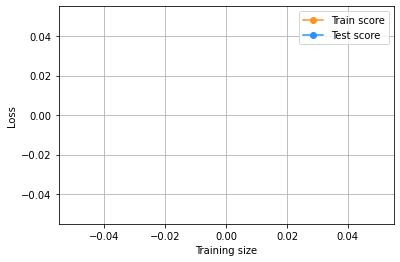

In [ ]:
plot_learning_curve(svm_under, X_train_under_scaled, y_train_under)

In [ ]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_leaf_nodes':[10,11,12,13,14,15 ], 'max_depth':[2,3,4,5,6,7]}
grid_rf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3, return_train_score=True, n_jobs=-1)
grid_rf.fit(X_train_under_scaled,y_train_under)

print("Best Parameter",grid_rf.best_params_)

tree_clf = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=14, random_state=0).fit(X_train_under_scaled, y_train_under)

tree_y_pred = tree_clf.predict(X_test_under)

print_score(y_test_under, tree_y_pred)

plot_acc(tree_clf, X_train_under_scaled, y_train_under)

plot_learning_curve(tree_clf, X_train_under_scaled, y_train_under)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_leaf_nodes': [10, 11, 12, 13, 14, 15]},
             return_train_score=True)

In [ ]:
print("Best Parameter",grid_rf.best_params_)

Best Parameter {'max_depth': 5, 'max_leaf_nodes': 14}


In [ ]:

tree_clf = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=14, random_state=0).fit(X_train_under_scaled, y_train_under)

tree_y_pred = tree_clf.predict(X_test_under)

In [ ]:
print_score(y_test_under, tree_y_pred)

Recall Score: 0.9993891264508247
Precision Score: 0.4980213089802131
Accuracy Score: 0.497869750456482
F1 Score: 0.6647704185290532


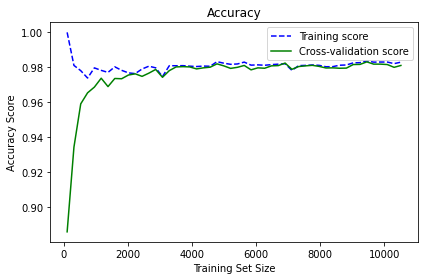

In [ ]:
plot_acc(tree_clf, X_train_under_scaled, y_train_under)

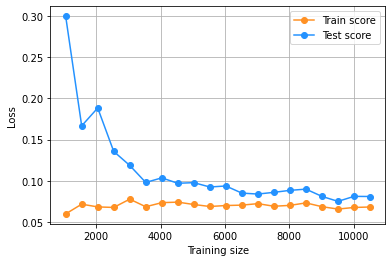

In [ ]:
plot_learning_curve(tree_clf, X_train_under_scaled, y_train_under)

In [ ]:
!jupyter nbconvert --to markdown "/content/drive/MyDrive/ml/8조 최종수정.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/ml/8조 최종수정.ipynb to markdown
[NbConvertApp] Support files will be in 8조 최종수정_files/
[NbConvertApp] Making directory /content/drive/MyDrive/ml/8조 최종수정_files
[NbConvertApp] Making directory /content/drive/MyDrive/ml/8조 최종수정_files
[NbConvertApp] Making directory /content/drive/MyDrive/ml/8조 최종수정_files
[NbConvertApp] Making directory /content/drive/MyDrive/ml/8조 최종수정_files
[NbConvertApp] Making directory /content/drive/MyDrive/ml/8조 최종수정_files
[NbConvertApp] Making directory /content/drive/MyDrive/ml/8조 최종수정_files
[NbConvertApp] Writing 21167 bytes to /content/drive/MyDrive/ml/8조 최종수정.md
